In [1]:
import matplotlib.pyplot as plt
from pydicom import dcmread
import os
import numpy as np
import cv2
import skimage
from skimage import measure

In [2]:
from ipywidgets import interact_manual, interact
from ipywidgets import widgets

In [3]:
from ipynb.fs.full.wspFFA import wspFirefly
from ipynb.fs.full.wspCS import wspCuckooSearch
from ipynb.fs.full.wspKH import wspKrillHerd
from ipynb.fs.full.wspEHO import wspElephantHerding
from ipynb.fs.full.wspABC import wspArtificialBeeColony

In [4]:
from ipynb.fs.full.wspShannonEvaluation import wspShannonEvaluation
from ipynb.fs.full.wspTsallisEvaluation import wspTsallisEvaluation

In [5]:
def read_dicom_image(file_path):
    medical_image = dcmread(file_path)
    pixel_array = medical_image.pixel_array
    return medical_image, pixel_array

In [6]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

In [7]:
def show_dicom_image(med_img, title=""):
    plt.figure(figsize=(15, 7))
    plt.imshow(med_img, cmap='gray')
    plt.title(title)
    plt.axis('off')

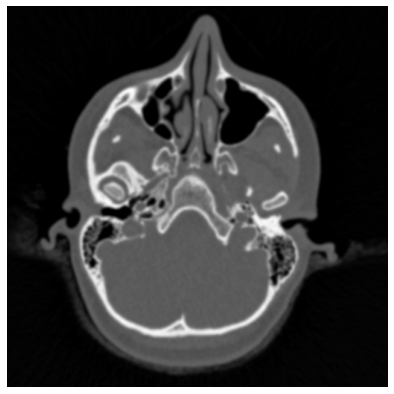

In [8]:
medical_image, pixel_array = read_dicom_image("../Database/2EFVJVCN/I1680000")

hu_image = transform_to_hu(medical_image, pixel_array)

show_dicom_image(hu_image)

In [9]:
lower_bound = int(pixel_array.min())
upper_bound = int(pixel_array.max())
print(lower_bound, upper_bound)

0 2946


0 2946
0 2946


(-0.5, 511.5, 511.5, -0.5)

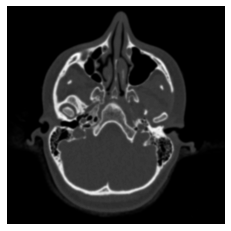

In [10]:
row, col = pixel_array.shape
output_img = pixel_array.copy()
c = 1
b = 1.5

normalized = pixel_array
transformed = normalized**b
max_val = transformed.max()
output_img = (transformed/max_val)*upper_bound
output_img = output_img.astype(np.uint16)
print(pixel_array.min(), pixel_array.max())
print(output_img.min(), output_img.max())
plt.imshow(output_img, cmap='gray')
plt.axis("off")

In [11]:
normalized

array([[29, 19, 13, ..., 31, 31, 28],
       [31, 23, 16, ..., 29, 28, 24],
       [32, 30, 24, ..., 27, 24, 21],
       ...,
       [38, 40, 43, ..., 56, 59, 62],
       [42, 44, 44, ..., 62, 63, 65],
       [44, 44, 43, ..., 67, 67, 68]], dtype=uint16)

In [12]:
transformed

array([[156.16977941,  82.81907993,  46.87216658, ..., 172.60069525,
        172.60069525, 148.16207342],
       [172.60069525, 110.30412504,  64.        , ..., 156.16977941,
        148.16207342, 117.57550765],
       [181.01933598, 164.31676725, 117.57550765, ..., 140.29611541,
        117.57550765,  96.23408959],
       ...,
       [234.24773211, 252.98221281, 281.96985654, ..., 419.06562732,
        453.18759912, 488.18848819],
       [272.19110933, 291.86298155, 291.86298155, ..., 488.18848819,
        500.04699779, 524.04675364],
       [291.86298155, 291.86298155, 281.96985654, ..., 548.41863572,
        548.41863572, 560.74236508]])

In [13]:
pixel_array

array([[29, 19, 13, ..., 31, 31, 28],
       [31, 23, 16, ..., 29, 28, 24],
       [32, 30, 24, ..., 27, 24, 21],
       ...,
       [38, 40, 43, ..., 56, 59, 62],
       [42, 44, 44, ..., 62, 63, 65],
       [44, 44, 43, ..., 67, 67, 68]], dtype=uint16)

In [14]:
output_img

array([[ 2,  1,  0, ...,  3,  3,  2],
       [ 3,  2,  1, ...,  2,  2,  2],
       [ 3,  3,  2, ...,  2,  2,  1],
       ...,
       [ 4,  4,  5, ...,  7,  8,  8],
       [ 5,  5,  5, ...,  8,  9,  9],
       [ 5,  5,  5, ..., 10, 10, 10]], dtype=uint16)

In [15]:
def main(b):
    c = 1
    #b = 1.35

    output_img = pixel_array**b

    plt.imshow(output_img, cmap='gray')
    plt.axis('off')

In [16]:
interact(main, b=widgets.FloatSlider(min=0, max=10, step=0.01, value=1))

interactive(children=(FloatSlider(value=1.0, description='b', max=10.0, step=0.01), Output()), _dom_classes=('…

<function __main__.main(b)>